<a href="https://colab.research.google.com/github/saif14/MyProject/blob/master/artcellSongCreate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving artcellSongs.txt to artcellSongs.txt


In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
data = open('/content/artcellSongs.txt').read()

In [0]:
data

"নোনা স্বপ্নে গড়া\nতোমার স্মৃতি\nশত রঙে রাঙিয়ে মিথ্যে\nকোনো স্পন্দন\nআলোর নিচে যে আঁধার\nখেলা করে\nসে আঁধারে শরীর মেশালে\nহে...\n\nনোনা স্বপ্নে গড়া\nতোমার স্মৃতি\nশত রঙে রাঙিয়ে মিথ্যে\nকোনো স্পন্দন\nআলোর নিচে যে আঁধার\nখেলা করে\nসে আঁধারে শরীর মেশালে\nহে...\n\nআজ আমি ধূসর কি রঙিন\nসময়ে\nপথ হারাই তোমাতে\nজীবনের কাঁটা তারে তুমি\nঅন্ত্যমিলের\nঅপূর্ণতায়\nবেওয়ারিশ ঘুড়ি উড়ে\nযাও অনাবিল\nআকাশের শূণ্যতায়\nতবু আমি...\n\nকী খুঁজি মানুষের\nবিষাদের চোখে\nকোথায় আলোর উৎসবে\nস্বপ্নের প্রতিবিম্ব\nভাঙে\nএকা একা আমি থাকি\nদাঁড়ায়ে\nস্মৃতির ঝড়ো বাতাসে\nদু'জনার শরীর মেশাই\nকী খুঁজি মানুষের\nবিষাদের চোখে\nকোথায় আলোর উৎসবে\nস্বপ্নের প্রতিবিম্ব\nভাঙে\nএকা একা আমি থাকি\nদাঁড়ায়ে\nস্মৃতির ঝড়ো বাতাসে\nদু'জনার শরীর মেশাই\n\nআজ আমি ধূসর কি রঙিন\nসময়ে\nপথ হারাই তোমাতে\nজীবনের কাঁটা তারে তুমি\nঅন্ত্যমিলের\nঅপূর্ণতায়\nবেওয়ারিশ ঘুড়ি উড়ে\nযাও অনাবিল\nআকাশের শূণ্যতায়\n\nজীবনের কাঁটা তারে তুমি\nঅন্ত্যমিলের\nঅপূর্ণতায়\nবেওয়ারিশ ঘুড়ি উড়ে\nযাও অনাবিল\nআকাশের শূণ্যতায়\n\nতবু আমি...\nআমার অবারিত দরজা

In [0]:
tokenizer = Tokenizer()
corpus = data.split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [0]:
word_index = tokenizer.word_index
print(word_index)

{'তোমার': 1, 'আমার': 2, 'আমি': 3, 'কত': 4, 'তোমাকে': 5, 'না': 6, 'আলো': 7, 'আকাশ': 8, 'তুমি': 9, 'একা': 10, 'তবু': 11, 'থাকে': 12, 'গেছে': 13, 'জন্য': 14, 'পথ': 15, 'মিথ্যে': 16, 'আলোর': 17, 'থাকা': 18, 'এই': 19, 'পথে': 20, 'সময়': 21, 'আঁধারে': 22, 'শরীর': 23, 'কি': 24, 'চোখে': 25, 'কেনো': 26, 'আছে': 27, 'স্বপ্ন': 28, 'স্মৃতি': 29, 'যে': 30, 'আসে': 31, 'স্মৃতির': 32, 'সময়': 33, 'আজ': 34, 'হয়ে': 35, 'নীল': 36, 'ভেসে': 37, 'এখানে': 38, 'যেন': 39, 'পৃথিবী': 40, 'তারা': 41, 'আকাশের': 42, 'আবার': 43, 'এঁকে': 44, 'ফিরে': 45, 'মাঝে': 46, 'দূরের': 47, 'থেমে': 48, 'কোনো': 49, 'বলে': 50, 'শুধু': 51, 'অন্ধকার': 52, 'ঘরে': 53, 'যায়': 54, 'কার': 55, 'করে': 56, 'রোদ': 57, 'এ': 58, 'শব্দ': 59, 'যত': 60, 'নেই': 61, 'মতো': 62, 'ও': 63, 'ফেলে': 64, 'শেষে': 65, 'আঁকা': 66, 'মুখোশ': 67, 'পাথর': 68, 'চায়': 69, 'ভাবি': 70, 'ধূসর': 71, 'মানুষের': 72, 'কোথায়': 73, 'কেউ': 74, 'মানুষ': 75, 'চিহ্ন': 76, 'চোখের': 77, 'ছায়ায়': 78, 'মিশে': 79, 'কাছে': 80, 'জমা': 81, 'আমায়': 82, 'সময়ে': 83, 'চেয়ে': 84, 'বেঁচে'

In [0]:
model = Sequential()
model.add(Embedding(total_words, 120, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(170, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(150))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 4, 120)            111600    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 4, 340)            395760    
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 340)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 150)               294600    
_________________________________________________________________
dense_14 (Dense)             (None, 465)               70215     
_________________________________________________________________
dense_15 (Dense)             (None, 930)               433380    
Total params: 1,305,555
Trainable params: 1,305,555
Non-trainable params: 0
____________________________________________

In [0]:
history = model.fit(predictors, label, epochs=120, verbose=1)

Epoch 1/120
62/62 [==============================] - 3s 42ms/step - loss: 7.6768 - accuracy: 0.0071
Epoch 2/120
62/62 [==============================] - 3s 42ms/step - loss: 6.3727 - accuracy: 0.0133
Epoch 3/120
62/62 [==============================] - 3s 42ms/step - loss: 6.0766 - accuracy: 0.0107
Epoch 4/120
62/62 [==============================] - 3s 42ms/step - loss: 5.9117 - accuracy: 0.0117
Epoch 5/120
62/62 [==============================] - 3s 41ms/step - loss: 5.7506 - accuracy: 0.0112
Epoch 6/120
62/62 [==============================] - 3s 41ms/step - loss: 5.6405 - accuracy: 0.0138
Epoch 7/120
62/62 [==============================] - 3s 42ms/step - loss: 5.5333 - accuracy: 0.0168
Epoch 8/120
62/62 [==============================] - 3s 42ms/step - loss: 5.4259 - accuracy: 0.0229
Epoch 9/120
62/62 [==============================] - 3s 42ms/step - loss: 5.3128 - accuracy: 0.0250
Epoch 10/120
62/62 [==============================] - 3s 42ms/step - loss: 5.2300 - accuracy: 0.0275

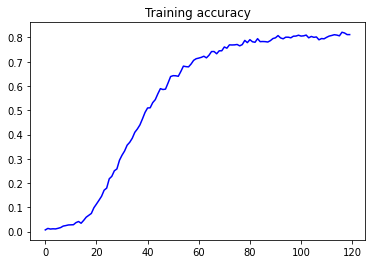

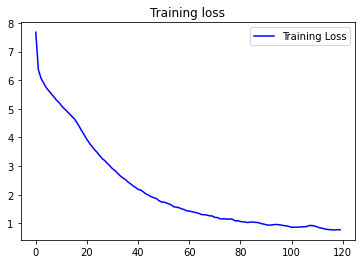

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "তোমাকে ভেবে"
next_words = 150
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

তোমাকে ভেবে জ্বলছে মিলিয়ে গানে শ্যাওলা এগারো আমরা কালো চলে গেলে আজও আলো পথে মেঘ আসে থাকা হারিয়ে এসে দেয় আমার দেয় না দিতে রঙিন পার গানে – ছায়ায় থেমে থাকা চেন না না যাকে থাকা আকাশে আমার এসে ধুয়ে ধুয়ে অজানায় আমার মিলায় কাছে কি না পথের এগারো বছরের পুরুষ ঠাণ্ডা থাকা নিও দেখ দেখ থাকবে শব্দময় মায়াতে ভেসে থাকা বিদায়ে তোমায় রাত একলা পথে পথে দু'জনেই দূরত্ব পথে দেখি এগারো মৃত্যু পড়ে থাকা আলো দেয় না তবু না পথের বলে পরাজয় জুড়ে কি না পথের সাথে পরাজয় জুড়ে কি তবু দিতে পার রোদ অজানায় পথে নয় আলোতে ভয় মুছে মুছে শূন্যতা রং কাঁটাতারে ছায়ায় থেমে থাকা আলো আমার এসে কাঁটাতারে ছায়ায় না ভোর শুনে পার ছায়ায় থেমে থাকা চেন না না যাকে থাকা আকাশে আমার এসে ধুয়ে ধুয়ে অজানায় আমার মিলায় কাছে কি না পথের এগারো বছরের পুরুষ ঠাণ্ডা থাকা নিও দেখ দেখ থাকবে শব্দময় মায়াতে ভেসে থাকা বিদায়ে তোমায়
